## Regression

In this lecture, we will bring together various techniques for feature engineering that we have covered in this course to tackle a regression problem. This would give you an idea of the end-to-end pipeline to build machine learning algorithms for regression.

## House Prices dataset

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

C:\Users\Lena\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load Datasets

In [6]:
# load dataset
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'SalePrice']
data = pd.read_csv('../datasets/houseprice.csv', usecols=cols)

print(data.shape)

data.head()

(1460, 12)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,GarageArea,SalePrice
0,60,65.0,8450,7,5,2003,196.0,856,1710,3,548,208500
1,20,80.0,9600,6,8,1976,0.0,1262,1262,3,460,181500
2,60,68.0,11250,7,5,2002,162.0,920,1786,3,608,223500
3,70,60.0,9550,7,5,1970,0.0,756,1717,3,642,140000
4,60,84.0,14260,8,5,2000,350.0,1145,2198,4,836,250000


In [7]:
# let's inspect the type of variables in pandas

data.dtypes

MSSubClass        int64
LotFrontage     float64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearRemodAdd      int64
MasVnrArea      float64
TotalBsmtSF       int64
GrLivArea         int64
BedroomAbvGr      int64
GarageArea        int64
SalePrice         int64
dtype: object

In [13]:
data = data.fillna(0)

### Separate train and test set

In [14]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1),  # predictors
    data['SalePrice'],  # target
    test_size=0.25, 
    random_state=0)

X_train.shape, X_test.shape

((1095, 11), (365, 11))

In [15]:
ls = Lasso()

In [16]:
# let's fit the pipeline
ls.fit(X_train, y_train)

# let's get the predictions
X_train_preds = ls.predict(X_train)
X_test_preds = ls.predict(X_test)

In [17]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 1117098597.244632
train rmse: 33423.02495652708
train r2: 0.8200628509262202

test mse: 2148941600.2685814
test rmse: 46356.67805471593
test r2: 0.674497321283938


Text(0, 0.5, 'Predicted Price')

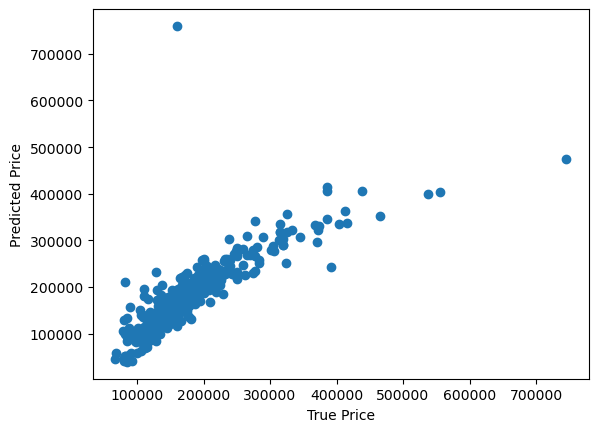

In [18]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')